In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from PIL import Image
import subprocess
import face_recognition
from tensorflow.keras.models import load_model

2024-04-09 18:37:16.287640: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-09 18:37:16.287666: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-09 18:37:16.288528: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-09 18:37:16.293911: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-09 18:37:17.026404: W tensorflow/compiler/tf2

In [2]:


# Especifica la ruta del archivo h5 de tu modelo
ruta_modelo_h5 = 'M_hats_0904_200E_Gray.h5'

# Cargar el modelo
model = load_model(ruta_modelo_h5)

# Ahora el modelo está cargado y listo para ser utilizado


2024-04-09 18:37:19.900915: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-09 18:37:19.903482: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-09 18:37:19.903702: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
clases = ""
with open('clases.txt', 'r') as f:
    clases = f.readlines()
clases = [c.strip() for c in clases]

In [5]:
#A color
imagen = face_recognition.load_image_file("5.jpg")
                    
# Redimensionar la imagen a 150x150
imagen_redimensionada = np.array(Image.fromarray(imagen).resize((224, 224)))
X_test = np.array([imagen_redimensionada])
X_test = X_test.astype('float32') / 255


In [8]:
#A grises
imagen = Image.open("5.jpg").convert('L')
                    
# Redimensionar la imagen a 150x150
imagen_redimensionada = np.array(imagen.resize((224, 224)))
X_test = np.array([imagen_redimensionada])
X_test = X_test.astype('float32') / 255

2024-04-09 18:39:49.380636: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


1/1 [==============================] - 1s 622ms/step
La etiqueta predicha es: PORK PIE


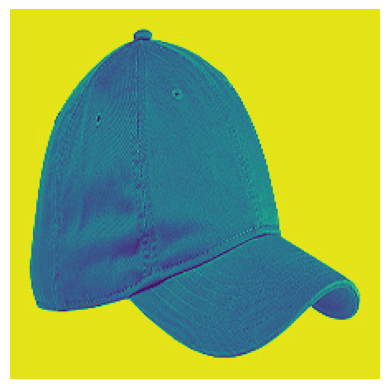

In [9]:
import matplotlib.pyplot as plt
# Cargar las clases desde el archivo


# Realizar la predicción
prediccion = model.predict(X_test)

# Obtener el índice de la clase predicha
indice_predicho = np.argmax(prediccion)

# Obtener la etiqueta predicha
etiqueta_predicha = clases[indice_predicho]

# Imprimir la etiqueta predicha
print("La etiqueta predicha es:", etiqueta_predicha)


imagen_prueba = imagen_redimensionada
# Suponiendo que 'imagen' es tu array numpy que contiene la imagen
plt.imshow(imagen_prueba)
plt.axis('off')  # Desactivar los ejes si no son necesarios
plt.show()